Tesla Stock – LSTM Stock prediction

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/ML/LSTM/Data/TSLA.csv')

EDA

In [5]:
df = df.dropna()

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,6/30/2010,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,7/1/2010,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,7/2/2010,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,7/6/2010,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
3043,8/1/2022,903.830017,935.630005,885.000000,891.830017,891.830017,39014300
3044,8/2/2022,882.010010,923.500000,878.000000,901.760010,901.760010,31859200
3045,8/3/2022,915.000000,928.650024,903.450012,922.190002,922.190002,26697000
3046,8/4/2022,933.000000,940.820007,915.000000,925.900024,925.900024,24085400


In [25]:
#Converting date column into date typed column 
df[["Date"]] = df[["Date"]].apply(pd.to_datetime)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3048 non-null   datetime64[ns]
 1   Open       3048 non-null   float64       
 2   High       3048 non-null   float64       
 3   Low        3048 non-null   float64       
 4   Close      3048 non-null   float64       
 5   Adj Close  3048 non-null   float64       
 6   Volume     3048 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 166.8 KB


In [ ]:
#convert the date column to index
df.set_index('Date', inplace=True)

In [54]:
print(list(df))

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


(array([-5.0e+07,  0.0e+00,  5.0e+07,  1.0e+08,  1.5e+08,  2.0e+08,
         2.5e+08,  3.0e+08,  3.5e+08]),
 [Text(0, -50000000.0, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 50000000.0, '0.5'),
  Text(0, 100000000.0, '1.0'),
  Text(0, 150000000.0, '1.5'),
  Text(0, 200000000.0, '2.0'),
  Text(0, 250000000.0, '2.5'),
  Text(0, 300000000.0, '3.0'),
  Text(0, 350000000.0, '3.5')])

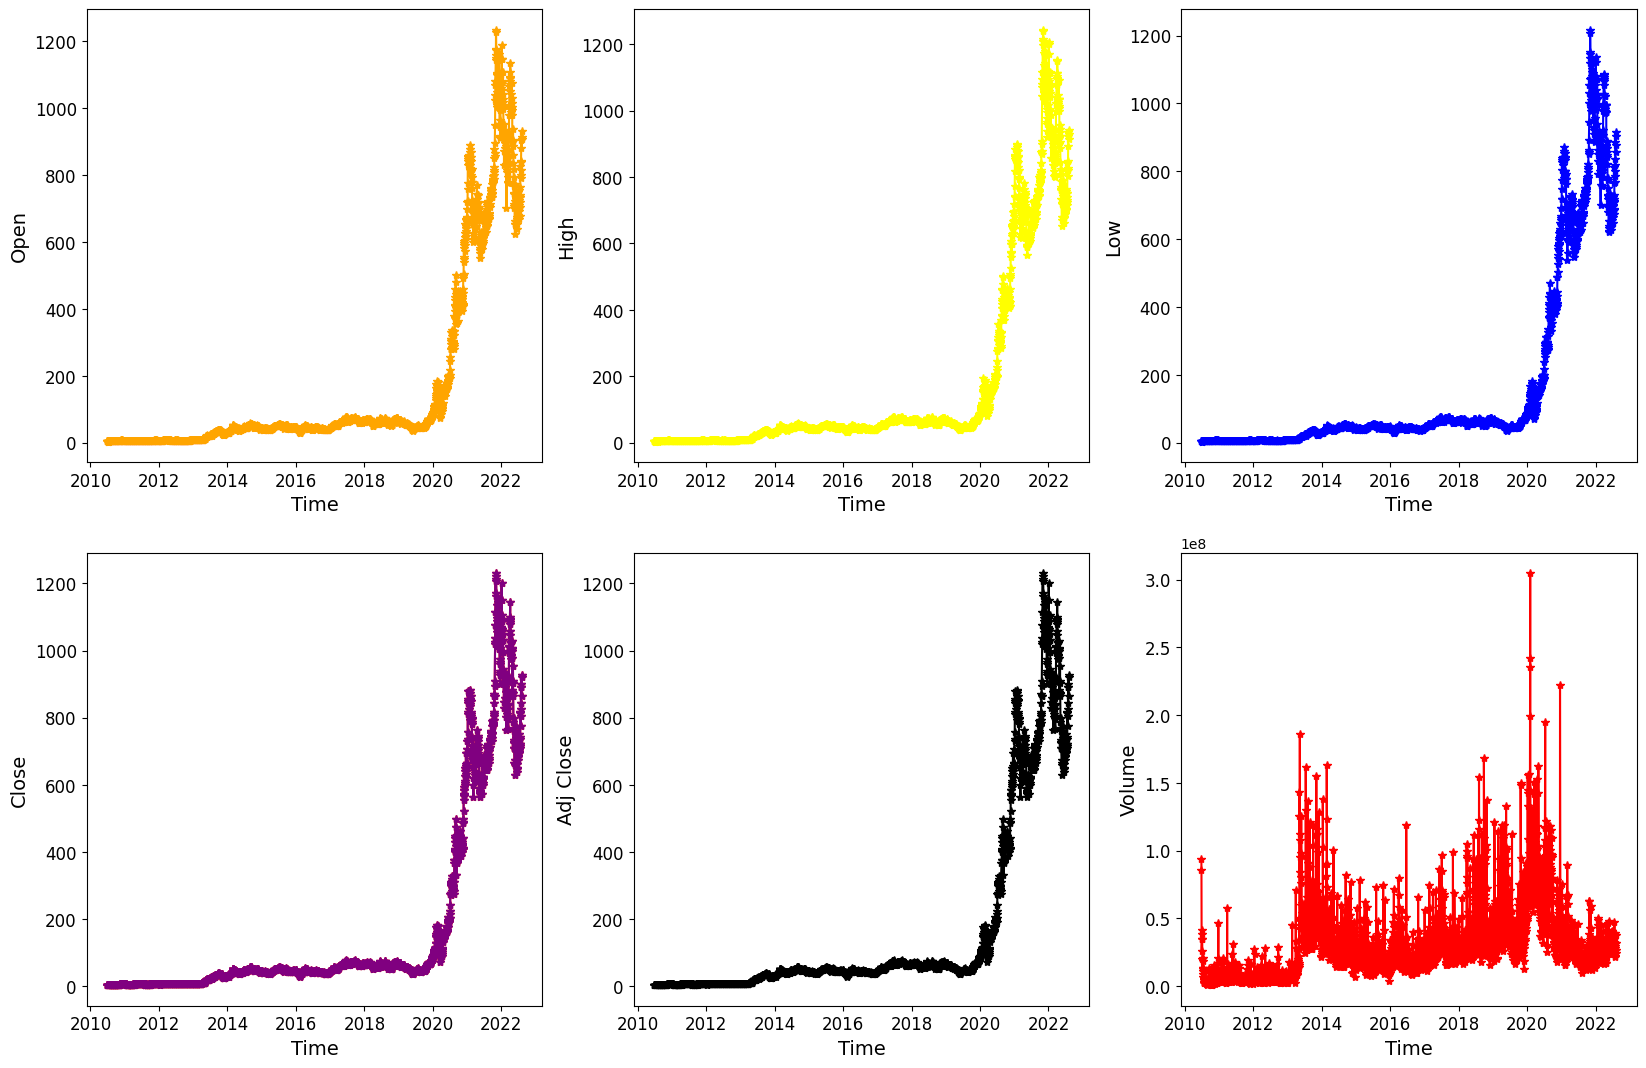

In [68]:
# Creating figure object
plt.figure()
 
# adding first subplot
plt.subplot(331)
plt.plot(df['Open'], color="orange", marker="*")
pyplot.xlabel('Time', fontsize=14)
pyplot.ylabel('Open', fontsize=14)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#pyplot.xlim(0, 20)
#pyplot.ylim(0, 20)
#pyplot.legend(fontsize = 12, loc='upper left')
#plt.figure(figsize=(20,20))
 
# adding second subplot
plt.subplot(332)
plt.plot(df['High'], color="yellow", marker="*")
pyplot.xlabel('Time', fontsize=14)
pyplot.ylabel('High', fontsize=14)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#pyplot.xlim(0, 20)
#pyplot.ylim(0, 20)
#plt.figure(figsize=(20,20))

# adding second subplot
plt.subplot(333)
plt.plot(df['Low'], color="blue", marker="*")
pyplot.xlabel('Time', fontsize=14)
pyplot.ylabel('Low', fontsize=14)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#pyplot.xlim(0, 20)
#pyplot.ylim(0, 20)
#plt.figure(figsize=(20,20))

# adding second subplot
plt.subplot(334)
plt.plot(df['Close'], color="red", marker="*")
pyplot.xlabel('Time', fontsize=14)
pyplot.ylabel('Close', fontsize=14)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#pyplot.xlim(0, 20)
#pyplot.ylim(0, 20)
#plt.figure(figsize=(20,20))

# adding second subplot
plt.subplot(334)
plt.plot(df['Close'], color="purple", marker="*")
pyplot.xlabel('Time', fontsize=14)
pyplot.ylabel('Close', fontsize=14)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#pyplot.xlim(0, 20)
#pyplot.ylim(0, 20)
#plt.figure(figsize=(20,20))


# adding second subplot
plt.subplot(335)
plt.plot(df['Adj Close'], color="black", marker="*")
pyplot.xlabel('Time', fontsize=14)
pyplot.ylabel('Adj Close', fontsize=14)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#pyplot.xlim(0, 20)
#pyplot.ylim(0, 20)
#plt.figure(figsize=(20,20))

# adding second subplot
plt.subplot(336)
plt.plot(df['Volume'], color="red", marker="*")
pyplot.xlabel('Time', fontsize=14)
pyplot.ylabel('Volume', fontsize=14)
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)
#pyplot.xlim(0, 20)
#pyplot.ylim(0, 20)
#plt.figure(figsize=(20,20))

#LSTM model

In [69]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools
import random
import os

In [72]:
print(list(df))

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [73]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

Feature Scaling

In [74]:
sc = MinMaxScaler(feature_range=(0, 1))
data_scaled = sc.fit_transform(df)

In [75]:
data_scaled.shape

(3048, 5)

In [76]:
data_scaled

array([[0.00046459, 0.00134982, 0.00042174, 0.00131893, 0.30660487],
       [0.0015676 , 0.0022239 , 0.00137067, 0.00130915, 0.28063985],
       [0.00143927, 0.00149819, 0.0008715 , 0.00100428, 0.13318415],
       ...,
       [0.74056636, 0.74613038, 0.74172244, 0.74915833, 0.0858414 ],
       [0.75518646, 0.75594358, 0.7512364 , 0.7521826 , 0.07725348],
       [0.7348889 , 0.73417227, 0.70315584, 0.70213979, 0.12187641]])

In [77]:
# Creating a data structure (it does not work when you have only one feature)
def create_data(df, n_future, n_past, train_test_split_percentage, validation_split_percentage):
    n_feature = df.shape[1]
    x_data, y_data = [], []
    
    for i in range(n_past, len(df) - n_future + 1):
        x_data.append(df[i - n_past:i, 0:n_feature])
        y_data.append(df[i + n_future - 1:i + n_future, 0])
    
    split_training_test_starting_point = int(round(train_test_split_percentage*len(x_data)))
    split_train_validation_starting_point = int(round(split_training_test_starting_point*(1-validation_split_percentage)))
    
    x_train = x_data[:split_train_validation_starting_point]
    y_train = y_data[:split_train_validation_starting_point]
    
    # if you want to choose the validation set by yourself, uncomment the below code.
    x_val = x_data[split_train_validation_starting_point:split_training_test_starting_point]
    y_val =  x_data[split_train_validation_starting_point:split_training_test_starting_point]                                             
    
    x_test = x_data[split_training_test_starting_point:]
    y_test = y_data[split_training_test_starting_point:]
    
    return np.array(x_train), np.array(x_test), np.array(x_val), np.array(y_train), np.array(y_test), np.array(y_val)

Train/test split

In [78]:
# Number of days you want to predict into the future
# Number of past days you want to use to predict the future

X_train, X_test, X_val, y_train, y_test, y_val = create_data(data_scaled, n_future=10, n_past=50, train_test_split_percentage=0.7,
                                               validation_split_percentage = 0)

In [79]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(2092, 50, 5)
(897, 50, 5)
(2092, 1)
(897, 1)


In [80]:
#numpy to panda
y_train_pn = pd.DataFrame(y_train, columns = ['Column_A'])

<Axes: >

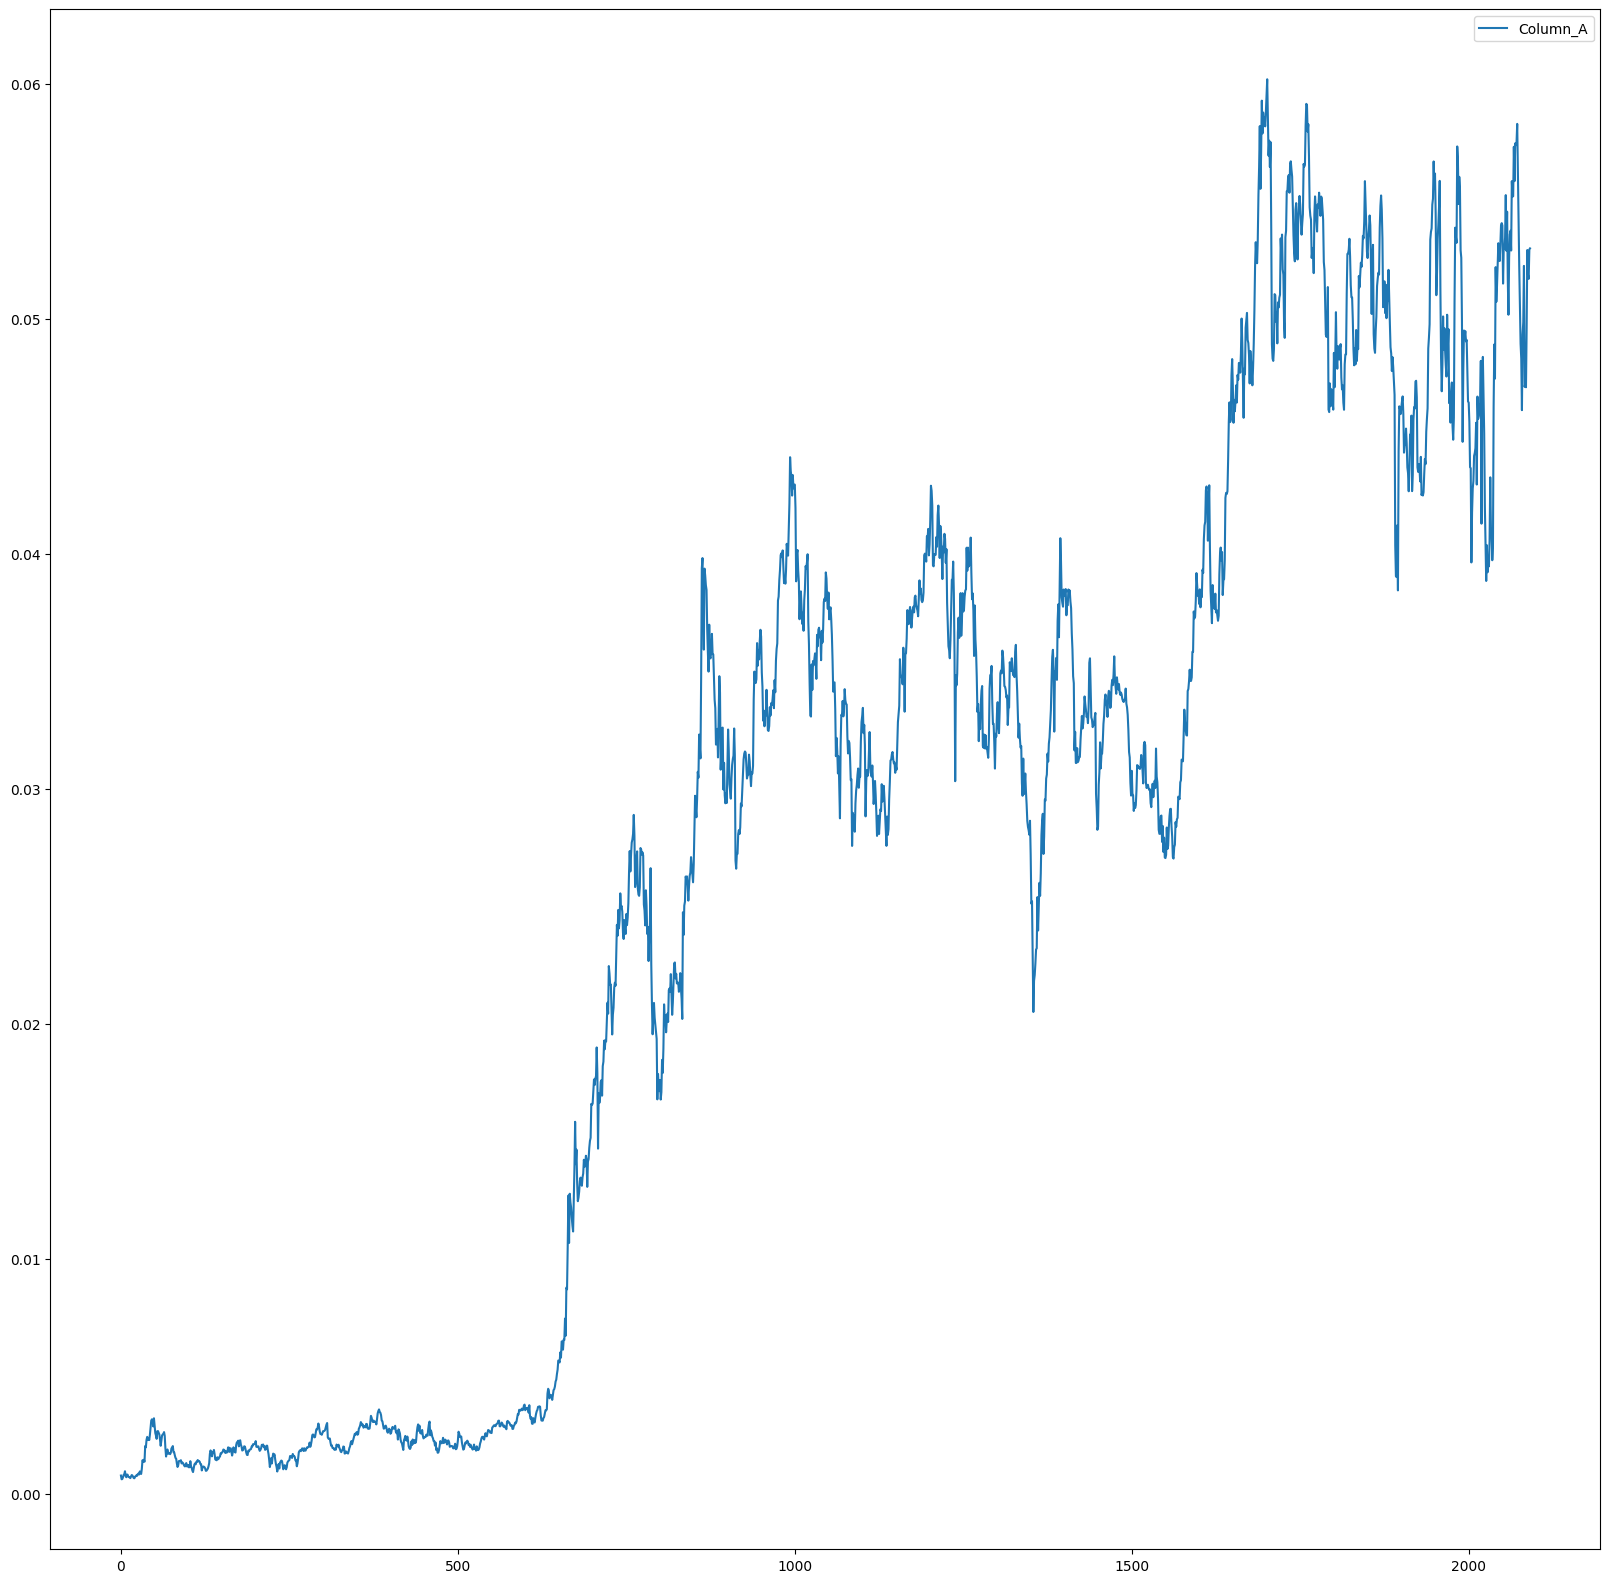

In [81]:
y_train_pn.plot()

LSTM model 

In [82]:
# ------------------LSTM-----------------------
regressor = Sequential()
regressor.add(LSTM(units=16, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=16, return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 16)            1408      
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 3,537
Trainable params: 3,537
Non-trainable params: 0
_________________________________________________________________


In [83]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#fit model
history = regressor.fit(X_train, y_train, validation_split=0.3, epochs=20, batch_size=64, callbacks=[es])

Epoch 1/20
23/23 [==============================] - 8s 148ms/step - loss: 4.9257e-04 - root_mean_squared_error: 0.0222 - val_loss: 2.1363e-04 - val_root_mean_squared_error: 0.0146
Epoch 2/20
23/23 [==============================] - 1s 52ms/step - loss: 1.4543e-04 - root_mean_squared_error: 0.0121 - val_loss: 2.2177e-04 - val_root_mean_squared_error: 0.0149
Epoch 3/20
23/23 [==============================] - 1s 55ms/step - loss: 8.6703e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.4005e-04 - val_root_mean_squared_error: 0.0118
Epoch 4/20
23/23 [==============================] - 1s 52ms/step - loss: 5.6641e-05 - root_mean_squared_error: 0.0075 - val_loss: 4.8428e-05 - val_root_mean_squared_error: 0.0070
Epoch 5/20
23/23 [==============================] - 1s 54ms/step - loss: 3.6755e-05 - root_mean_squared_error: 0.0061 - val_loss: 2.6474e-05 - val_root_mean_squared_error: 0.0051
Epoch 6/20
23/23 [==============================] - 1s 53ms/step - loss: 3.0766e-05 - root_mean_squared_

Evaluate model performance 

In [84]:
regressor.evaluate(X_test, y_test)

29/29 [==============================] - 0s 12ms/step - loss: 0.0252 - root_mean_squared_error: 0.1587


[0.025189045816659927, 0.1587105691432953]

In [85]:
y_pred = regressor.predict(X_train)

66/66 [==============================] - 2s 12ms/step


In [86]:
y_pred

array([[0.00117661],
       [0.00118929],
       [0.00120084],
       ...,
       [0.05098568],
       [0.05042403],
       [0.05010289]], dtype=float32)

In [87]:
#numpy to panda
y_pred_pn = pd.DataFrame(y_pred, columns = ['Column_A'])

<Axes: >

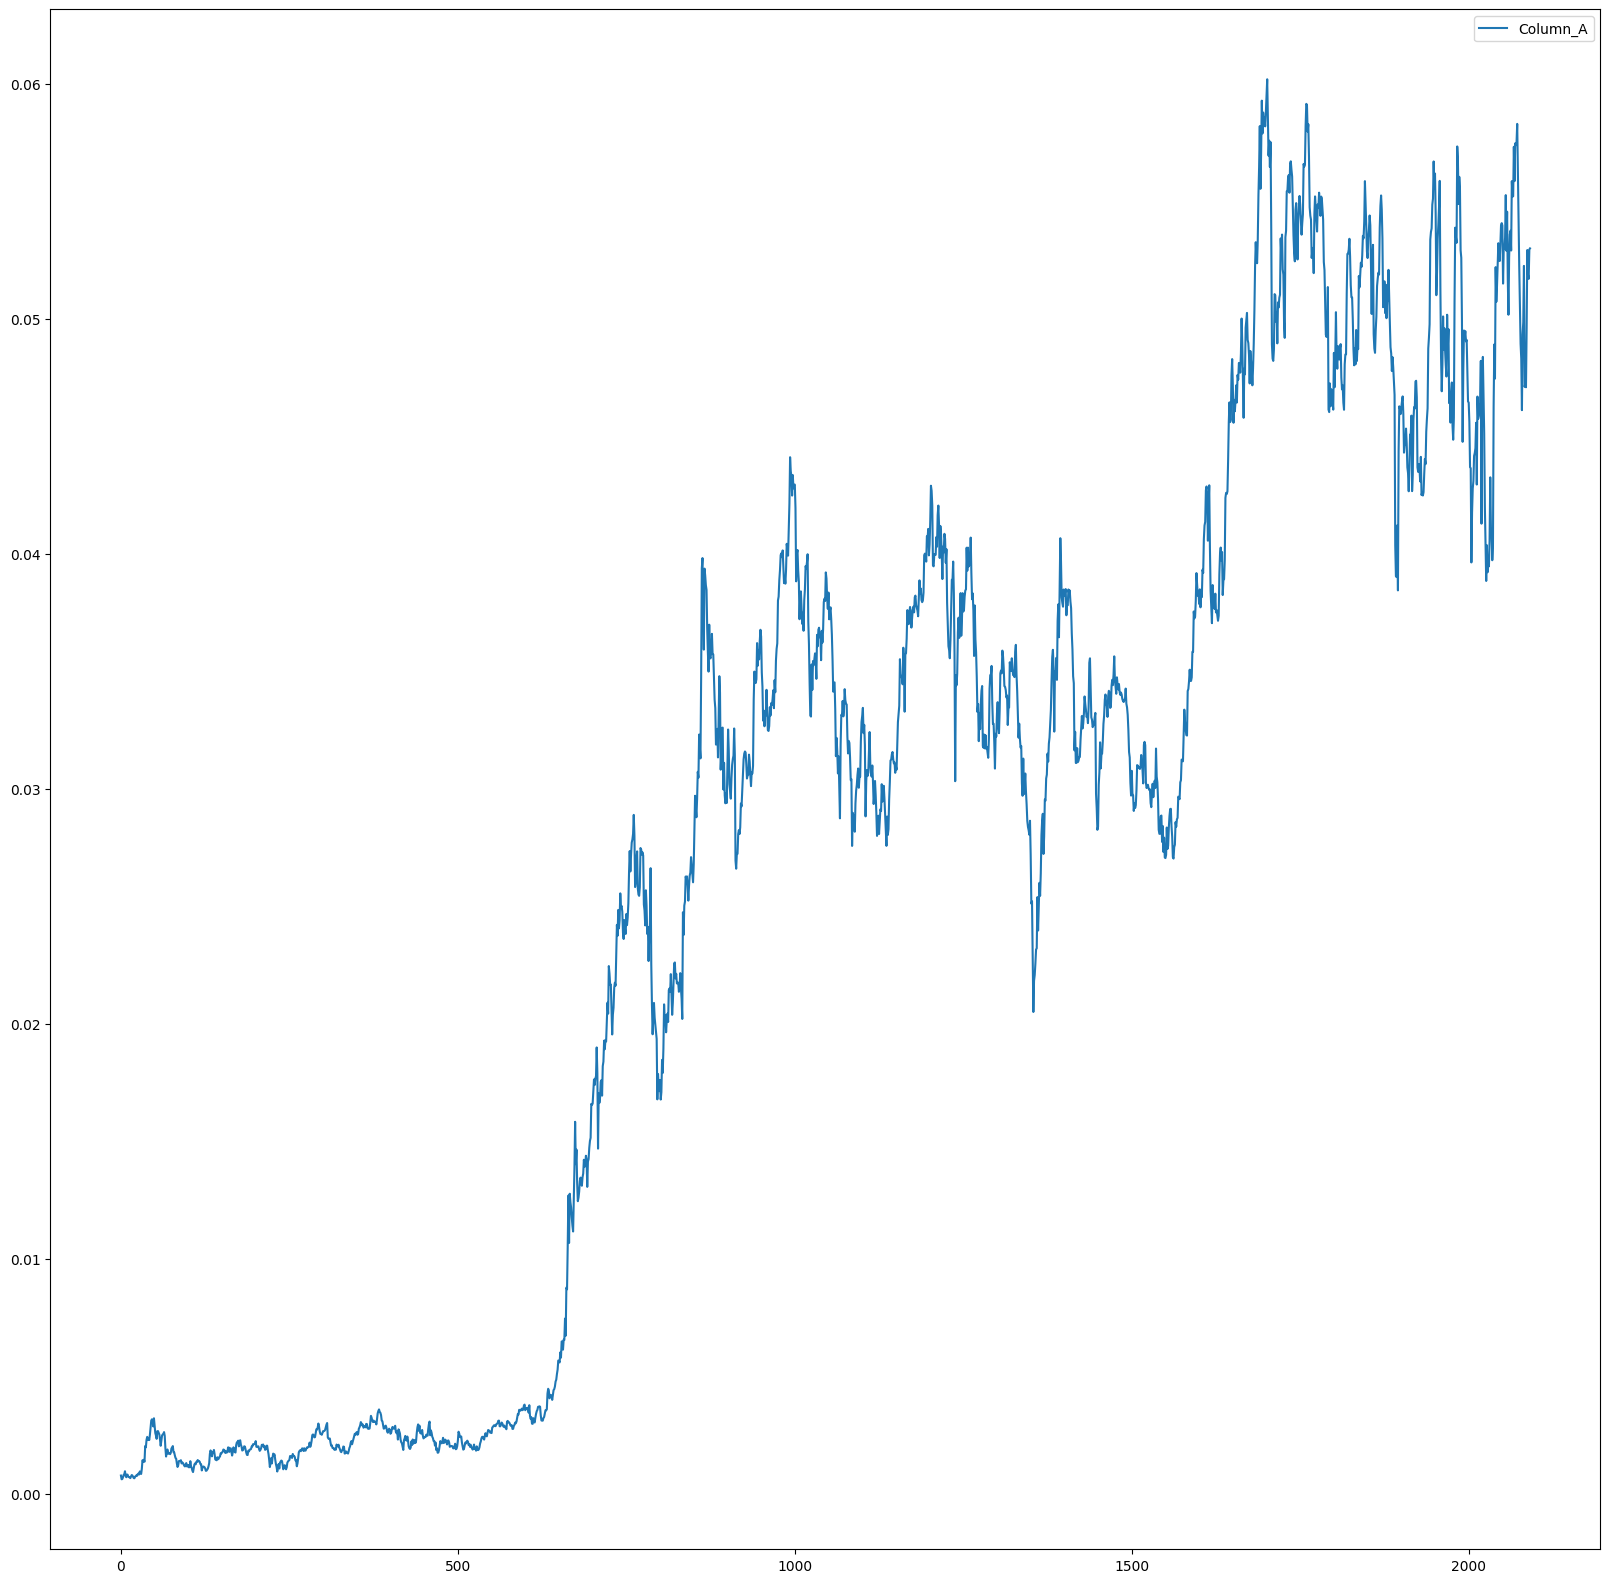

In [88]:
y_train_pn.plot()

66/66 [==============================] - 1s 15ms/step


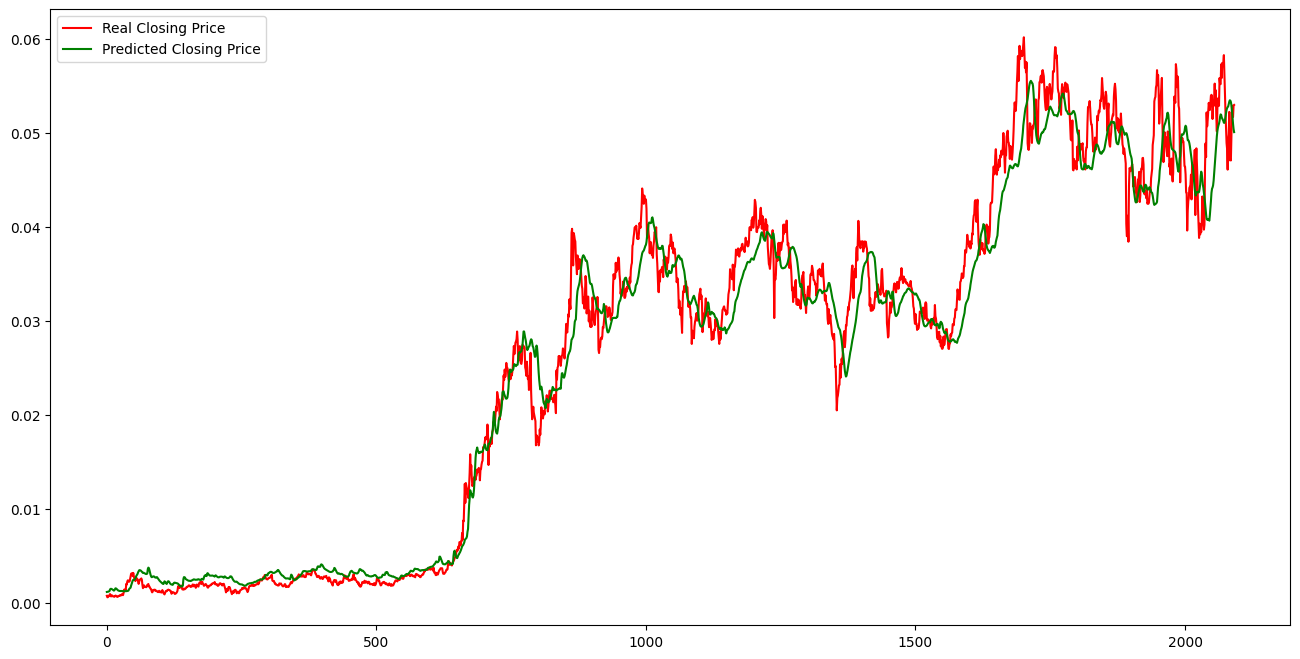

In [89]:
y_pred = regressor.predict(X_train)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_train, color='red', label = 'Real Closing Price')
plt.plot(y_pred, color='green', label = 'Predicted Closing Price')
plt.legend(loc='best')

29/29 [==============================] - 0s 13ms/step


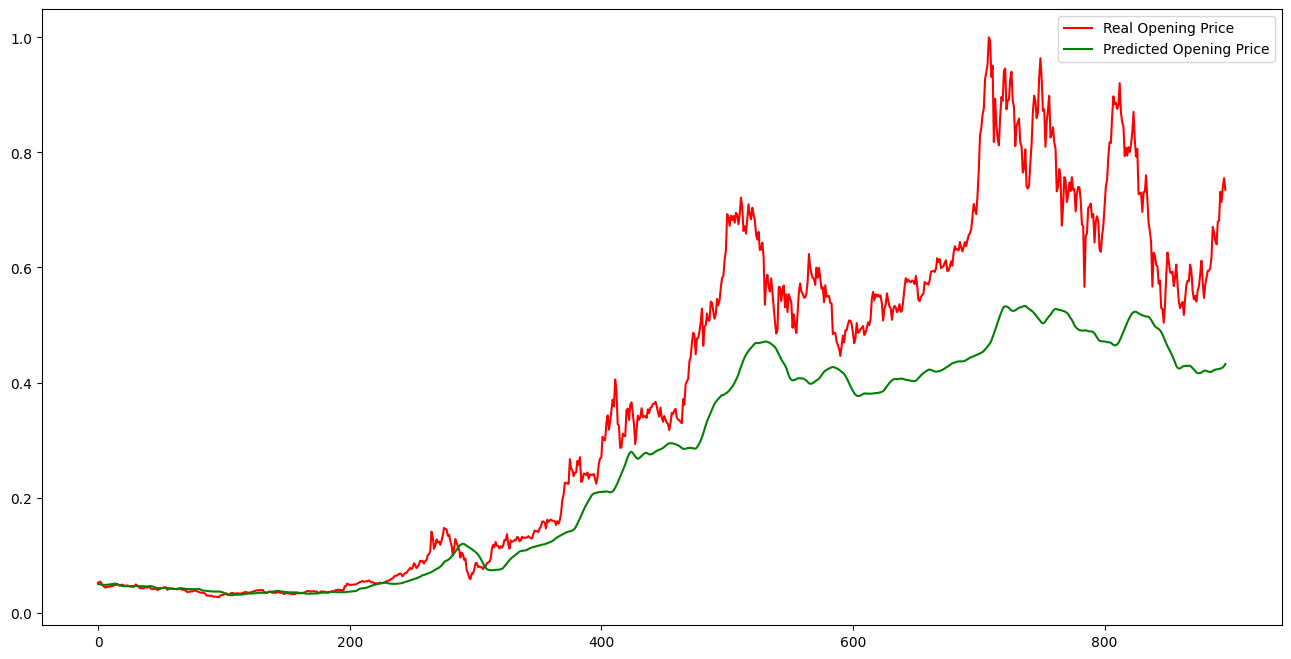

In [96]:
y_pred = regressor.predict(X_test)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test, color='red', label = 'Real Opening Price')
plt.plot(y_pred, color='green', label = 'Predicted Opening Price')
plt.legend(loc='best')

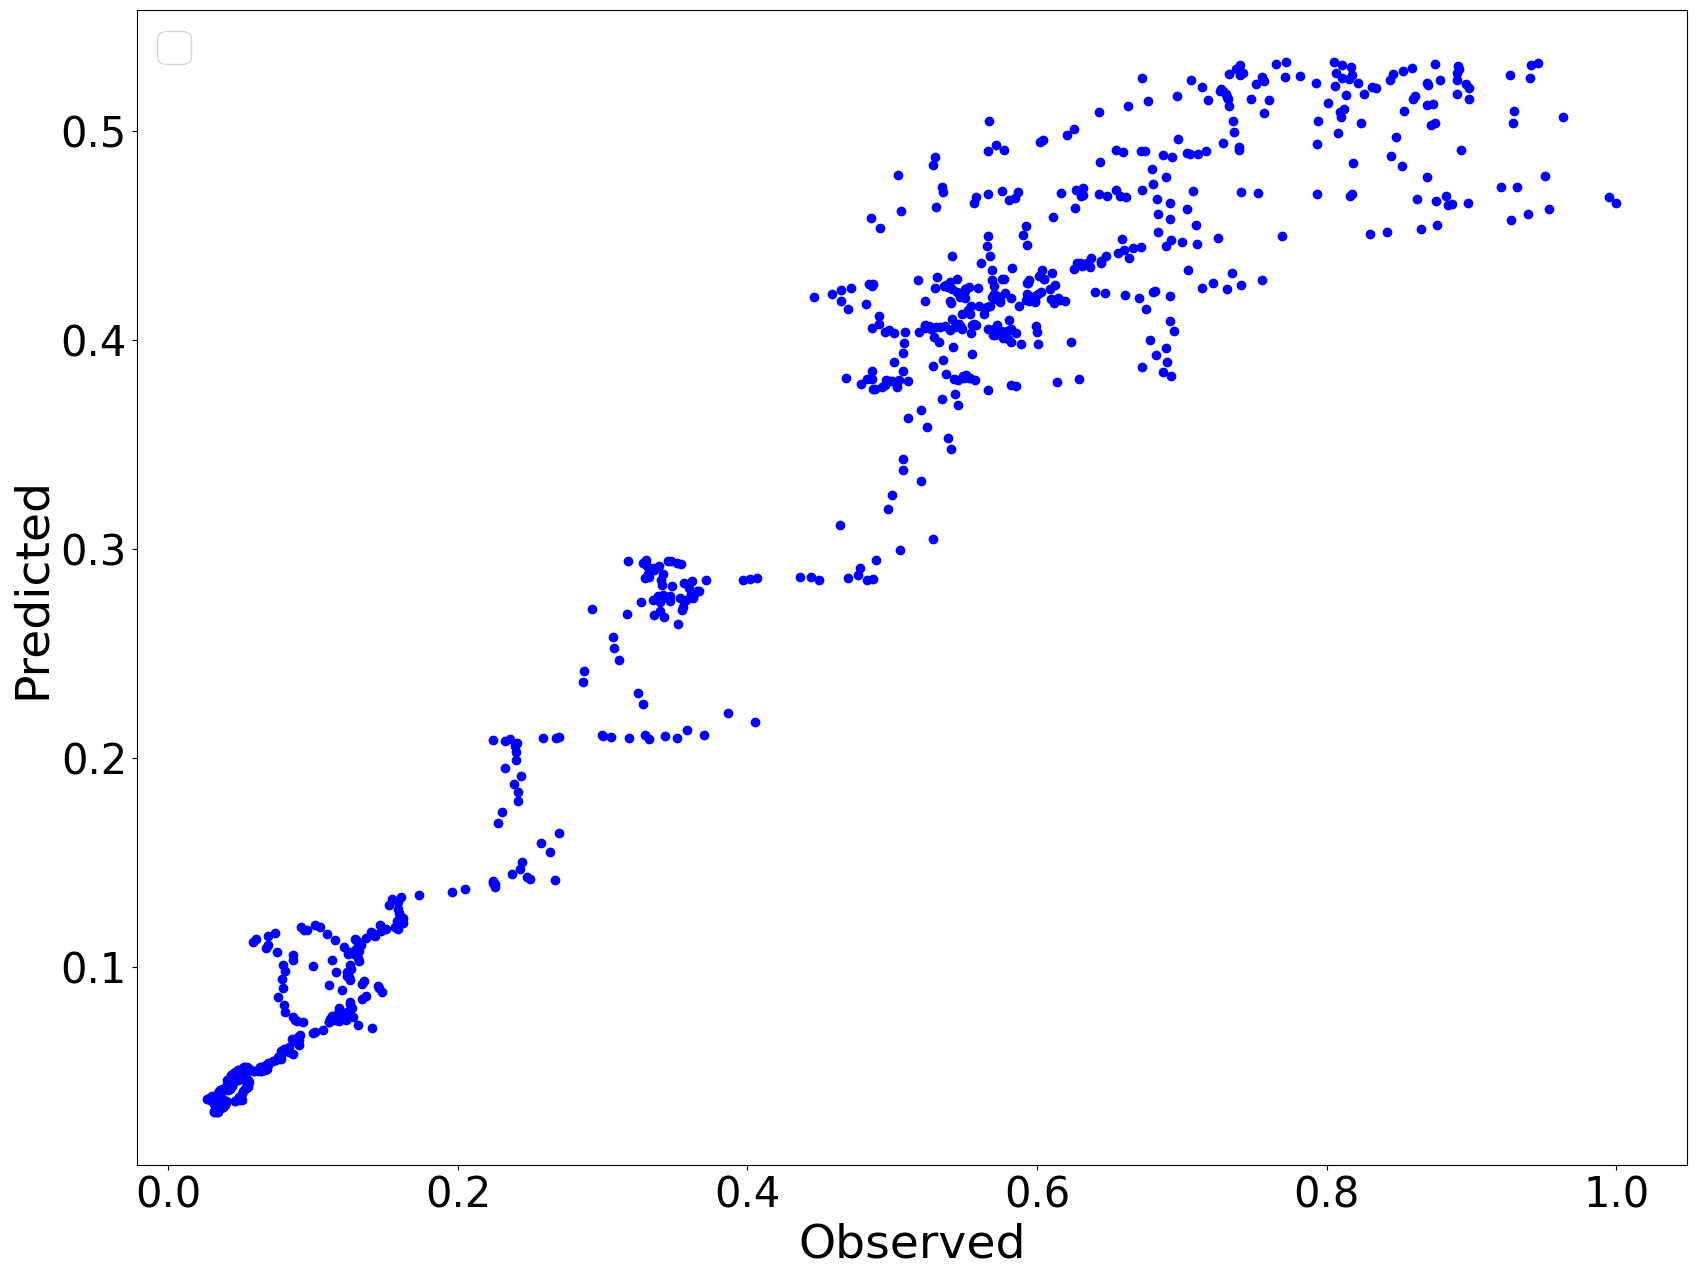

In [98]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
pyplot.scatter(y_test, y_pred, c='blue')
#pyplot.scatter(y_test.values, ypred_test, c='red', alpha=0.6, norm=2, label='Test')
pyplot.xlabel('Observed', fontsize=34)
pyplot.ylabel('Predicted', fontsize=34)
pyplot.xticks(fontsize=30)
pyplot.yticks(fontsize=30)
#pyplot.xlim(0, 5)
#pyplot.ylim(0, 5)
pyplot.legend(fontsize = 30, loc='upper left')

#plt.plot( [0,0.35], [0,0.35], linestyle='--', color='k' )


pyplot.show()